Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


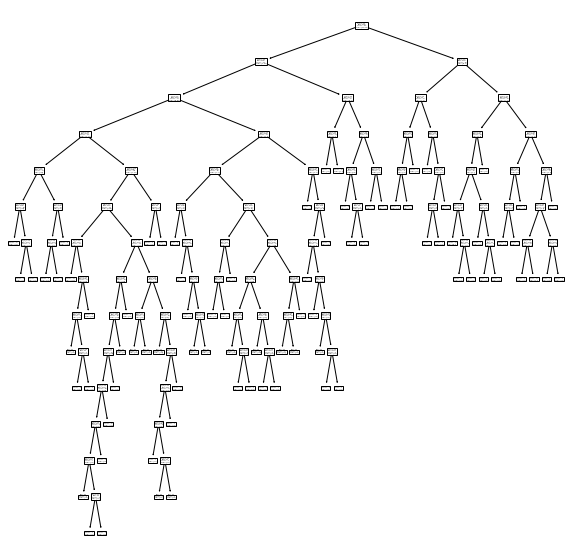

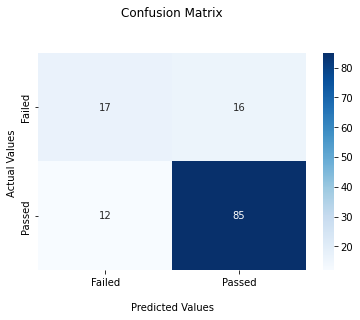

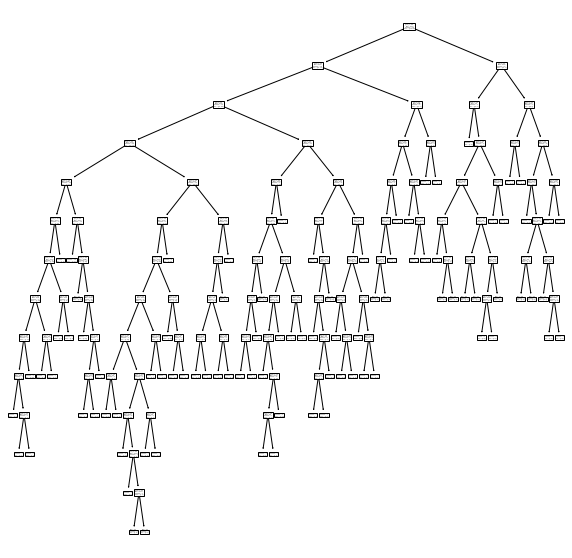

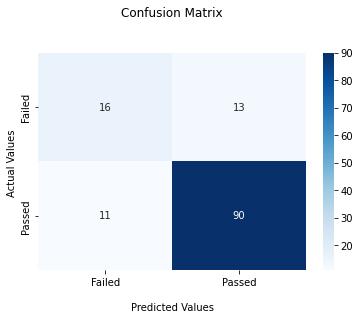

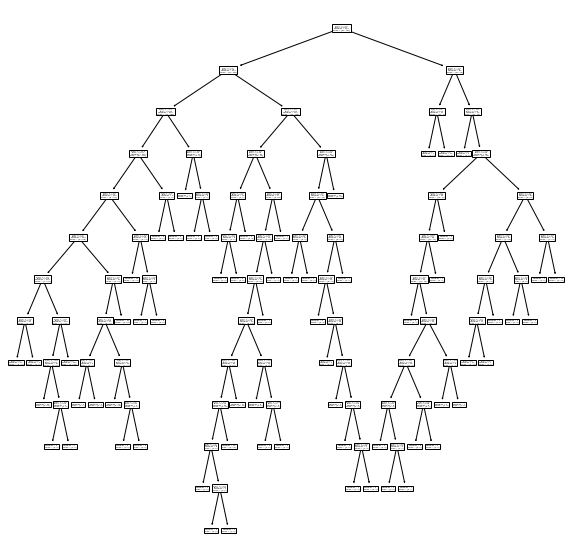

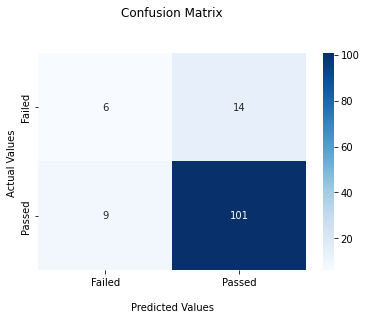

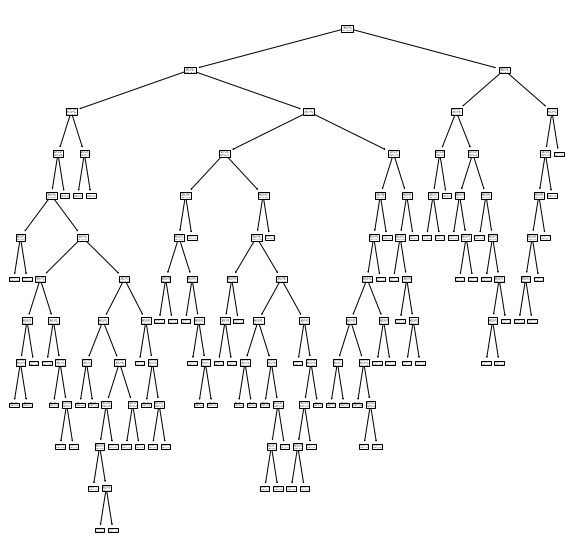

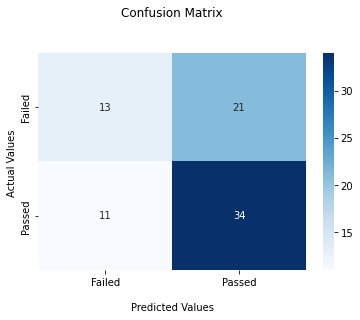

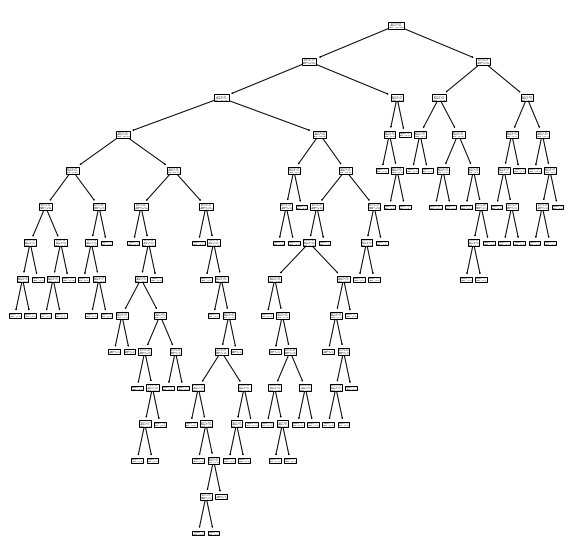

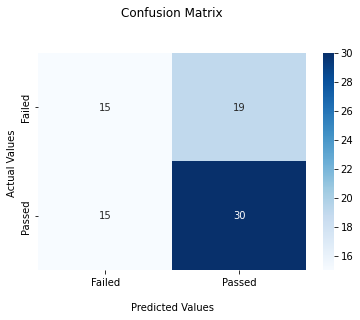

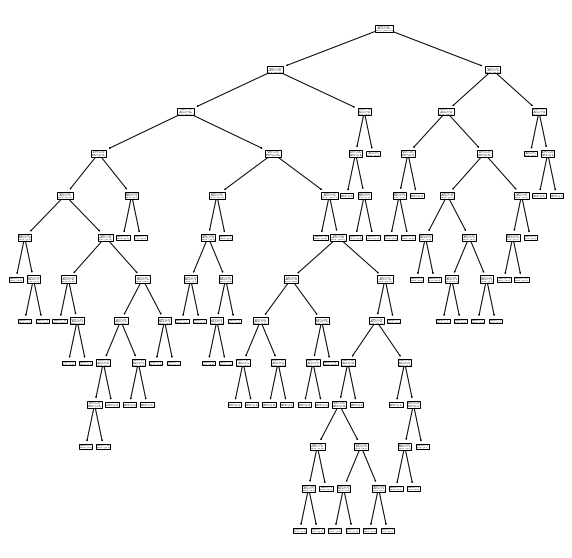

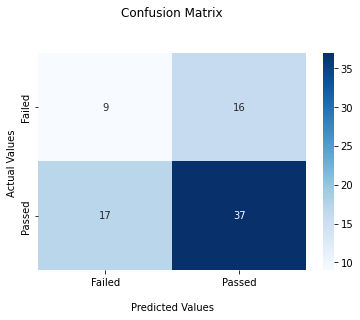

In [10]:
# # Install a pip package in the current Jupyter kernel
# import sys
# !{sys.executable} -m pip install data_process
from google.colab import drive
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
#from data_process import get_data, process_data
from sklearn.metrics import confusion_matrix, accuracy_score

drive.mount('/content/drive')
# with open('/content/drive/My Drive/Colab Notebooks/w4/winequality-red.csv', 'r') as f: 
#   temp = np.genfromtxt(f,delimiter=',',skip_header=1)

# X = temp[:,:-1]
# y = temp[:,-1]
import seaborn as sns
def plot_confusion_matrix(cf_matrix):
  ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='.3g')

  ax.set_title('Confusion Matrix\n\n');
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ');

  ## Ticket labels - List must be in alphabetical order
  ax.xaxis.set_ticklabels(['Failed','Passed'])
  ax.yaxis.set_ticklabels(['Failed','Passed'])

  ## Display the visualization of the Confusion Matrix.
  plt.show()

def process_data(data, headers):
    for header_idx, header in enumerate(headers):
        if header == "school":
            for row_idx in range(len(data[0:, header_idx])):
                if data[row_idx, header_idx] == "GP":
                    data[row_idx, header_idx] = 0
                else:
                    data[row_idx, header_idx] = 1
        elif header == "sex":
            for row_idx in range(len(data[0:, header_idx])):
                if data[row_idx, header_idx] == "F":
                    data[row_idx, header_idx] = 0
                else:
                    data[row_idx, header_idx] = 1
        elif header == "address":
            for row_idx in range(len(data[0:, header_idx])):
                if data[row_idx, header_idx] == "U":
                    data[row_idx, header_idx] = 0
                else:
                    data[row_idx, header_idx] = 1
        elif header == "famsize":
            for row_idx in range(len(data[0:, header_idx])):
                if data[row_idx, header_idx] == "LE3":
                    data[row_idx, header_idx] = 0
                else:
                    data[row_idx, header_idx] = 1
        elif header == "Pstatus":
            for row_idx in range(len(data[0:, header_idx])):
                if data[row_idx, header_idx] == "T":
                    data[row_idx, header_idx] = 0
                else:
                    data[row_idx, header_idx] = 1
        elif header == "Mjob" or header == "Fjob":
            for row_idx in range(len(data[0:, header_idx])):
                if data[row_idx, header_idx] == "teacher":
                    data[row_idx, header_idx] = 0
                elif data[row_idx, header_idx] == "health":
                    data[row_idx, header_idx] = 1
                elif data[row_idx, header_idx] == "services":
                    data[row_idx, header_idx] = 2
                elif data[row_idx, header_idx] == "at_home":
                    data[row_idx, header_idx] = 3
                else:
                    data[row_idx, header_idx] = 4
        elif header == "reason":
            for row_idx in range(len(data[0:, header_idx])):
                if data[row_idx, header_idx] == "home":
                    data[row_idx, header_idx] = 0
                elif data[row_idx, header_idx] == "reputation":
                    data[row_idx, header_idx] = 1
                elif data[row_idx, header_idx] == "course":
                    data[row_idx, header_idx] = 2
                else:
                    data[row_idx, header_idx] = 3
        elif header == "guardian":
            for row_idx in range(len(data[0:, header_idx])):
                if data[row_idx, header_idx] == "mother":
                    data[row_idx, header_idx] = 0
                elif data[row_idx, header_idx] == "father":
                    data[row_idx, header_idx] = 1
                else:
                    data[row_idx, header_idx] = 2
        elif (header == "schoolsup" or header == "famsup" or header == "paid"
            or header == 'activities' or header == 'nursery' or header == 'higher'
            or header == 'higher' or header == 'internet' or header == 'romantic'):
            for row_idx in range(len(data[0:, header_idx])):
                if data[row_idx, header_idx] == "yes":
                    data[row_idx, header_idx] = 0
                else:
                    data[row_idx, header_idx] = 1
        elif (header == "G1" or header == "G2" or header == "G3"):
          for row_idx in range(len(data[0:, header_idx])):
            data[row_idx, header_idx] = int(int(data[row_idx, header_idx]) >= 10)
    return data.astype(int)

def get_data():
    with open('/content/drive/My Drive/Colab Notebooks/proj/student-por.csv') as f:
        por_data = np.genfromtxt(f, delimiter=';', dtype='unicode')  

    for row_idx in range(len(por_data)):
        for col_idx in range(len(por_data[row_idx])):
            por_data[row_idx, col_idx] = por_data[row_idx, col_idx].strip('"')
    
    por_headers = por_data[0,:]
    por_data = por_data[1:, :]

    with open('/content/drive/My Drive/Colab Notebooks/proj/student-mat.csv') as f:
        mat_data = np.genfromtxt(f, delimiter=';', dtype='unicode')  

    for row_idx in range(len(mat_data)):
        for col_idx in range(len(mat_data[row_idx])):
            mat_data[row_idx, col_idx] = mat_data[row_idx, col_idx].strip('"')
    mat_headers = mat_data[0,:]
    mat_data = mat_data[1:, :]

    return ((mat_headers,mat_data),(por_headers,por_data))

# read in data from csvs
(mat_headers, mat_data), (por_headers, por_data) = get_data()

# reformat data to all integers
por_data = process_data(por_data, por_headers)
mat_data = process_data(mat_data, mat_headers)

por_x = por_data[:, :-3]
por_g1 = por_data[:, -3]
por_g2 = por_data[:, -2]
por_g3 = por_data[:, -1]

mat_x = mat_data[:, :-3]
mat_g1 = mat_data[:, -3]
mat_g2 = mat_data[:, -2]
mat_g3 = mat_data[:, -1]

def create_dt(X,y):
  # Data Partition into 80/20
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle = True, random_state=2)

  # Grow a classification tree
  clf = DecisionTreeClassifier(random_state=0)
  clf = clf.fit(X_train, y_train)

  # Plot a graph of the trained classification tree.
  plt.figure(figsize=(10,10))
  plot_tree(clf)
  plt.show()

  # Predict the validation set
  y_pred = clf.predict(X_test)
  Cmat = metrics.confusion_matrix(y_test,y_pred)
  #print('confusion matrix: \n', Cmat)
  return Cmat

#Creating a decision tree for Portuguese
por_g1_mat = create_dt(por_x,por_g1)
plot_confusion_matrix(por_g1_mat)
por_g2_mat = create_dt(por_x,por_g2)
plot_confusion_matrix(por_g2_mat)
por_g3_mat = create_dt(por_x,por_g3)
plot_confusion_matrix(por_g3_mat)
#Creating a decision tree for Math
mat_g1_mat = create_dt(mat_x,mat_g1)
plot_confusion_matrix(mat_g1_mat)
mat_g2_mat = create_dt(mat_x,mat_g2)
plot_confusion_matrix(mat_g2_mat)
mat_g3_mat = create_dt(mat_x,mat_g3)
plot_confusion_matrix(mat_g3_mat)
# drive.flush_and_unmount()
